In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gender classification.csv", encoding = "latin1")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
since  our target variable is the gender of this texts,we would need to foucs on that and try to concatenate 

the major ones,which is gender and description

SyntaxError: invalid syntax (<ipython-input-4-6e9e67492637>, line 1)

In [5]:
df1 = pd.concat([df.gender, df.description], axis = 1)
df1.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [6]:
df1.tail()

,gender,description
20045,female,(rp)
20046,male,"Whatever you like, it's not a problem at all. ..."
20047,male,#TeamBarcelona ..You look lost so you should f...
20048,female,Anti-statist; I homeschool my kids. Aspiring t...
20049,female,Teamwork makes the dream work.


In [7]:
we would need to check for missing values

SyntaxError: invalid syntax (<ipython-input-7-1b812c923659>, line 1)

In [8]:
df0 = df1.dropna()
df0.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In order to classify our data, we need to get rid of string values.

female -> 1   male -> 0

In [9]:
df0.gender = [1 if person == "female" else 0 for person in df0.gender]

C:\Users\user\anaconda3\New folder\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df0.head()

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


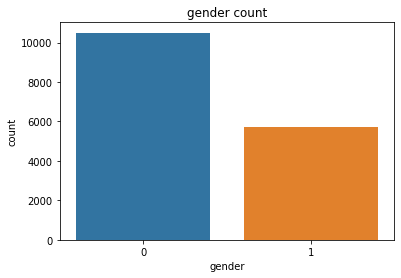

In [11]:
#Plot the counts of gender 
import seaborn as sns
sns.countplot(data = df, x= df0['gender']).set_title("gender count")
plt.show()

lets use our regular expression library to clean our data......

In [12]:
import re

In [13]:
df2 = df0.description[6]
df2

'A global marketplace for images, videos and music. Sharing photos, inspiration, design tips & videos for the creative community.'

In [14]:
df2 = re.sub("[^a-zA-z]", " ",df2)
df2

'A global marketplace for images  videos and music  Sharing photos  inspiration  design tips   videos for the creative community '

Using Regular Expression Library, I deleted ":)" symbol.

Also, in computer language, "BAND" and "band" words are understood differently. So I am going to convert all letters into lowercase. 

In [15]:
df2 = df2.lower()
df2

'a global marketplace for images  videos and music  sharing photos  inspiration  design tips   videos for the creative community '

In this part, I am going to clean all irrelavent words. For example, if we have a sentence like: "I go to the school every day." we don't need some words ("the", "to" etc.) while classifying if a sentence was written by a male or female. I am going to get rid of them.

In [16]:
import nltk # natural language took kit
from nltk.corpus import stopwords

I am going to split my descriptions one by one then check them if it is a stop word or not.

In [17]:
df2 = nltk.word_tokenize(df2)
df2

['a',
 'global',
 'marketplace',
 'for',
 'images',
 'videos',
 'and',
 'music',
 'sharing',
 'photos',
 'inspiration',
 'design',
 'tips',
 'videos',
 'for',
 'the',
 'creative',
 'community']

Using word_tokenize method instead of split is more beneficial. Because, for example if you have a word like "shouldn't". split method cannot divide it into two parts but word_tokenize divide it into two parts : should and n't. 

In [18]:
df2 = [word for word in df2 if not word in set(stopwords.words("english"))]
df2

['global',
 'marketplace',
 'images',
 'videos',
 'music',
 'sharing',
 'photos',
 'inspiration',
 'design',
 'tips',
 'videos',
 'creative',
 'community']

This part, I am going to find root of letters (lemmatization) in order to do classification.

In [19]:
import nltk as nlp

lemma = nlp.WordNetLemmatizer()
df2 = [lemma.lemmatize(i) for i in df2]

In [20]:
df2

['global',
 'marketplace',
 'image',
 'video',
 'music',
 'sharing',
 'photo',
 'inspiration',
 'design',
 'tip',
 'video',
 'creative',
 'community']

Some words have changed: images -> image, videos -> video

Now, I am going to make a sentence using these words.

In [21]:
df2 = " ".join(df2)
df2

'global marketplace image video music sharing photo inspiration design tip video creative community'

so thats practically how to clean a dataset,even though i just showed how to clean one line alone

but as we proceed,i will now do for the whole dataset......we would involve a for loop

In [22]:
description_list = []
for description in df0.description:
    description = re.sub("[^a-zA-z]", " ",description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    description = [word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [lemma.lemmatize(i) for i in description]
    description = " ".join(description)
    description_list.append(description)
    

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 5000
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")

In [30]:
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

In [31]:
print("5000 most common words: ", count_vectorizer.get_feature_names())

5000 most common words:  ['__', '___', '____', '_____', '_______', '_a', '_as', '_happiness', '_n', '_o', '_r', 'aa', 'aaron', 'ab', 'abacus', 'abc', 'aberdeen', 'ability', 'able', 'absolute', 'absolutely', 'absurdity', 'abuse', 'ac', 'academia', 'academic', 'academy', 'acc', 'accept', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accommodation', 'accomplish', 'account', 'accountant', 'accounting', 'acct', 'ace', 'achieve', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addition', 'address', 'admin', 'administrator', 'admirer', 'adopted', 'adoption', 'adorable', 'adore', 'adult', 'advance', 'advanced', 'advancing', 'adventure', 'adventurer', 'advertising', 'advice', 'advise', 'adviser', 'advisor', 'advocacy', 'advocate', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'affilia

In [32]:
x = sparce_matrix

In [33]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
Lets split our datasets

In [35]:
y = df0.iloc[:,0].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model training

Let's implement Naive Bayes Method for the Machine Learning part to make predictions.

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
predictions = nb.predict(x_test)

In [41]:
from sklearn import metrics

scikit-learn provides a function to calculate the precision and recall for a classifier

from a set of predictions and the corresponding set of trusted labels.

so we would import metrics from the sklearn library to carry the obligation out

In [50]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.36      0.50      2132
           1       0.41      0.83      0.55      1113

    accuracy                           0.53      3245
   macro avg       0.61      0.60      0.52      3245
weighted avg       0.67      0.53      0.52      3245



In [43]:
print("Accuracy: ", nb.score(predictions.reshape(-1,1), y_test))

Accuracy:  0.4745762711864407


In [49]:
print(metrics.confusion_matrix(y_test, predictions))

[[ 777 1355]
 [ 185  928]]
